<a href="https://colab.research.google.com/github/ProsperChuks/Population-Estimate-and-Projection/blob/main/population_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dependecies

In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 34.5 MB/s 
     |████████████████████████████████| 6.3 MB 33.4 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import regex

### Loading in the Data

In [32]:
country_series_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-EstimatesCountry-Series.csv')
country_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-EstimatesCountry.csv')
main_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-EstimatesData.csv')
foot_note = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-EstimatesFootNote.csv')
time = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-EstimatesSeries-Time.csv')
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-EstimatesSeries.csv')
density = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Population-Density.csv')
rt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/dataset/Period_Indicator.csv')

In [4]:
main_data.drop(columns='Unnamed: 95', inplace=True)

In [33]:
grt

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Population change (thousands)","Medium fertility variant, 2020 - 2099: Annually interpolated demographic indicators - Population change (thousands)"
0,Afghanistan,AFG,1950,87538.0,NaN
1,Afghanistan,AFG,1951,91918.0,NaN
2,Afghanistan,AFG,1952,99744.0,NaN
3,Afghanistan,AFG,1953,107636.0,NaN
4,Afghanistan,AFG,1954,115628.0,NaN
...,...,...,...,...,...
36895,Zimbabwe,ZWE,2095,NaN,17903.0
36896,Zimbabwe,ZWE,2096,NaN,13532.0
36897,Zimbabwe,ZWE,2097,NaN,9516.0
36898,Zimbabwe,ZWE,2098,NaN,5922.0


### World's Population

In [7]:
world = main_data.loc[main_data['Country Name'] == 'World']

In [8]:
world.fillna(method='ffill', inplace=True)
world.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2046              0
2047              0
2048              0
2049              0
2050              0
Length: 95, dtype: int64

In [9]:
world.reset_index(drop=True, inplace=True)
year = world.max()
year[4:]
wrld = pd.DataFrame(year[4:], index=year[4:].index, columns=['World'])
px.line(wrld, wrld.index, 'World', labels={'x':'Year', 'World':'Population Count'}, 
        title='World\'s Population')

### World's Population by Region

#### Asia

In [10]:
east = main_data.loc[main_data['Country Name'].str.contains('^east asia[a-z]*', flags=regex.IGNORECASE, regex=True)]
south = main_data.loc[main_data['Country Name'].str.contains('^south asia[a-z]*', flags=regex.IGNORECASE, regex=True)]

east.fillna(method='ffill', inplace=True)
south.fillna(method='ffill', inplace=True)
print(east.isnull().sum())

east_max = east.iloc[:, 4:].max()
south_max = south.iloc[:, 4:].max()
final = east_max + south_max

new_asia = pd.DataFrame(final, index=final.index, columns=['Region'])
new_asia

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2046              0
2047              0
2048              0
2049              0
2050              0
Length: 95, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region
1960,1.614513e+09
1961,1.628596e+09
1962,1.655614e+09
1963,1.694383e+09
1964,1.733235e+09
...,...
2046,4.703051e+09
2047,4.707806e+09
2048,4.711525e+09
2049,4.714238e+09


In [11]:
px.line(new_asia, new_asia.index, 'Region', labels={'x':'Year', 'Region':'Population Count'}, 
        title='Asia\'s Population')

#### Africa

In [12]:
n_africa = main_data.loc[main_data['Country Code'].str.contains('mea', flags=regex.IGNORECASE, regex=True)]
s_africa = main_data.loc[main_data['Country Name'].str.contains('africa.*south', flags=regex.IGNORECASE, regex=True)]
w_africa = main_data.loc[main_data['Country Name'].str.contains('africa.*central', flags=regex.IGNORECASE, regex=True)]

n_africa.fillna(method='ffill', inplace=True)
s_africa.fillna(method='ffill', inplace=True)
w_africa.fillna(method='ffill', inplace=True)
n_africa = n_africa.iloc[:, 4:].max()
s_africa = s_africa.iloc[:, 4:].max()
w_africa = w_africa.iloc[:, 4:].max()

final = pd.concat([n_africa, s_africa, w_africa], axis=1)
final = final.sum(axis=1)

new_africa = pd.DataFrame(final, index=final.index, columns=['Region'])
new_africa

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Region
1960,3.324364e+08
1961,3.406288e+08
1962,3.491670e+08
1963,3.579950e+08
1964,3.671448e+08
...,...
2046,2.679577e+09
2047,2.723979e+09
2048,2.768401e+09
2049,2.812820e+09


In [13]:
px.line(new_africa, new_africa.index, 'Region', labels={'x':'Year', 'Region':'Population Count'}, 
        title='Africa\'s Population')

#### Europe

### World's Population Density (km²)

In [14]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries['pop_den'] = density['density(km)']

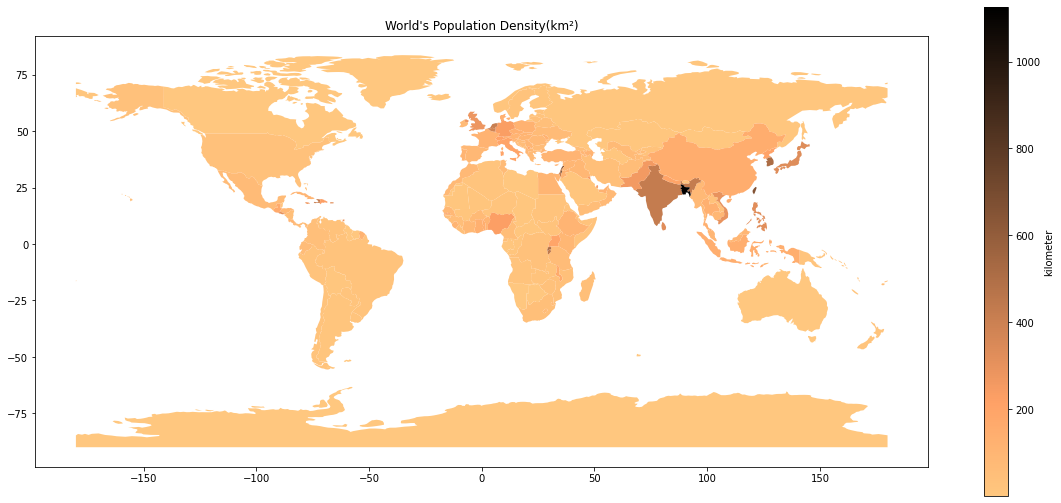

In [15]:
countries.plot(column='pop_den', figsize=(20, 9), legend=True,
               legend_kwds={'label': "kilometer"},
               cmap='copper_r', missing_kwds={'color': 'lightgrey'})
plt.title('World\'s Population Density(km²)')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Capstone Project/density.png')
plt.show()

### Growth Rate (%)

In [89]:
wgrt = rt.loc[rt['Location'].str.contains('^world$', flags=regex.IGNORECASE, regex=True)]
wgrt = wgrt.iloc[:, 3:-3]
col = list(wgrt.columns)
wgrt = wgrt[col[0:3] + [col[-1]] + col[3:16]]
wgrt = wgrt.iloc[1:-16, 2:4]
xra = pd.DataFrame({
    'MidPeriod': ['2020'],
    'GrowthRate': ['1.032']
})
wgrt = pd.concat([wgrt, xra])
wgrt.set_index(wgrt.MidPeriod, inplace=True)
wgrt.drop(columns='MidPeriod', axis=1, inplace=True)

In [118]:
fig = px.line(wgrt, wgrt.index, 'GrowthRate',
          labels={'x':'Year', 'GrowthRate':'Growth Rate '}, 
          title='Annual Population Growth Rate (%)')

fig.update_layout(xaxis={'showline':True, 
                         'linecolor':'rgb(0, 0, 0)'},
        plot_bgcolor='white')